# predict_cubic_data
use scikit-learn to predict cubic data

## packages

In [1]:
# load packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## dataset

In [2]:
# create dataset
obs_count = 101
x_var = np.linspace(start=0, stop=100, num=obs_count)
mean = 0
stddev = 0
y_var = 0.6 + (1/80000)*(x_var - 10)*(x_var - 50)*(x_var - 90) \
    + np.random.normal(loc=mean, scale=stddev, size=obs_count)

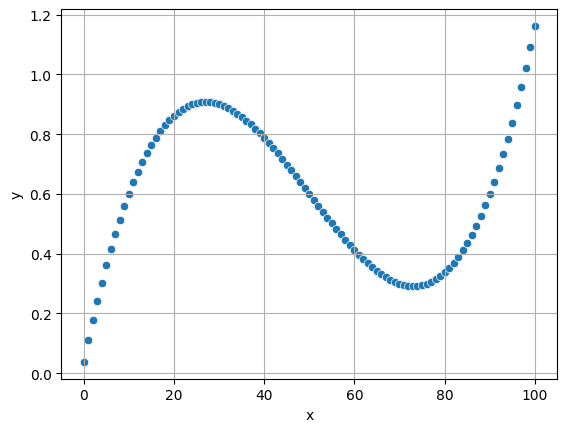

In [3]:
# display dataset
fig = sns.scatterplot(x=x_var, y=y_var)
fig.get_xaxis().set_label_text('x')
fig.get_yaxis().set_label_text('y')
plt.grid()
plt.show()

## splitting data

In [4]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(x_var, y_var, test_size=.2)
print(len(X_train), len(X_test))

80 21


## train data

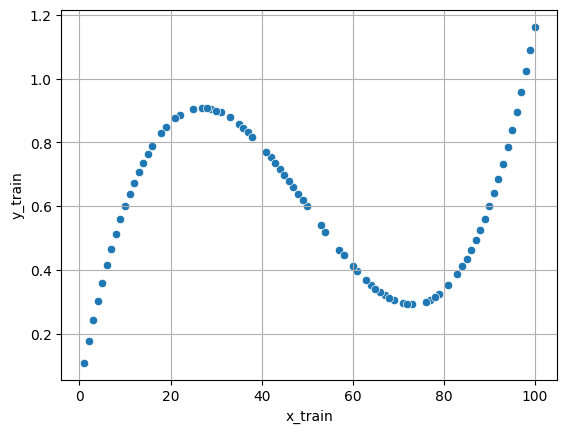

In [5]:
# display train data from dataset
fig = sns.scatterplot(x=X_train, y=y_train)
fig.get_xaxis().set_label_text('x_train')
fig.get_yaxis().set_label_text('y_train')
plt.grid()
plt.show()

## test data

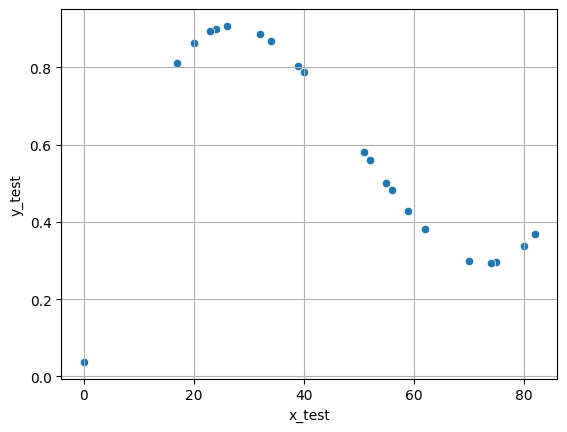

In [6]:
# display test data from dataset
fig = sns.scatterplot(x=X_test, y=y_test)
fig.get_xaxis().set_label_text('x_test')
fig.get_yaxis().set_label_text('y_test')
plt.grid()
plt.show()

## initialize model

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(3), LinearRegression())

## fit the model
Note: X_train has been reshaped into a 2-dimensional array, since the fit method and predict method expect 2D input arrays ([Ebner, 2022](https://www.sharpsightlabs.com/blog/sklearn-predict/)).

In [8]:
model.fit(X_train.reshape(-1,1), y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

## predict using the model

In [9]:
y_predict = model.predict(X_test.reshape(-1,1))

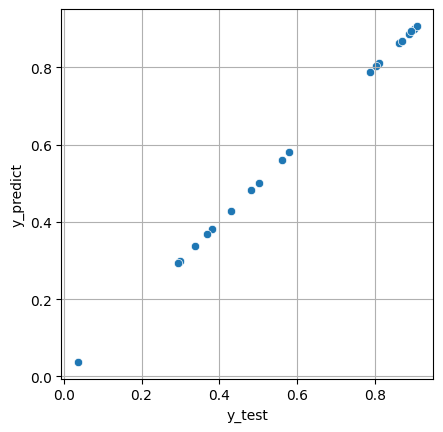

In [10]:
# compare predicted data and test data
plt.figure(figsize=(4.8, 4.8))
plt.grid()
fig = sns.scatterplot(x=y_predict, y=y_test)
fig.get_xaxis().set_label_text('y_test')
fig.get_yaxis().set_label_text('y_predict')
plt.show()